####  ФИО студента: Пудеев Максим Владимирович
####  Группа:       16 В-1
####  Вариант №9
####  Задание: NBA
#### 1  Определите игрока, принявшего участие в наибольшем числе игр.
#### 2. Определите год, в котором наиболее интенсивно играли в баскетбол.
#### 3. Определите самое популярное имя среди игроков.
#### 4. Постройте гистограмму по признаку Year.
#### 5. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
#### 6. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).
#### 7. Добавьте в набор данных признак, являющийся произведением двух других признаков.
#### 8. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.





In [4]:
import pandas as pd  #  Импортирование модулей для обработки данных
import numpy as np


In [5]:
dF=pd.read_csv('E:\\ML\\9_nba\\Seasons_Stats.csv')  #  Создание объекта и чтение таблицы по ссылке

In [7]:
dF.head() #Вывод начала таблицы


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [9]:
dF.columns #Вывод всех столбцов таблицы, т.к их не видно 

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

#### 1. Определите игрока, принявшего участие в наибольшем числе игр.

In [10]:
dF[(dF["G"]>=dF["G"].max())]


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2676,2676,1969.0,Walt Bellamy*,C,29.0,TOT,88.0,NaN,3159.0,18.0,...,0.649,NaN,NaN,1101.0,176.0,NaN,NaN,NaN,320.0,1527.0


#### 2.Определите год, в котором наиболее интенсивно играли в баскетбол.

In [11]:
dF.groupby(["Year"])["G"].sum().idxmax()


2015.0

#### 3.Определите самое популярное имя среди игроков.

In [12]:
dF.Player.value_counts() #необязательно, считаю количество имен.


Eddie Johnson        33
Mike Dunleavy        32
Gerald Henderson     29
Nazr Mohammed        28
Kevin Willis         27
George Johnson       26
Joe Smith            26
James Edwards        25
Juwan Howard         25
Andre Miller         25
Jim Jackson          24
Theo Ratliff         24
Reggie Williams      24
Tyrone Corbin        24
Charles Smith        23
Jason Kidd           23
Kevin Ollie          23
Rod Strickland       23
Chauncey Billups     23
Charles Jones        23
Vince Carter         23
Kevin Garnett        23
Drew Gooden          23
Kenny Anderson       22
Tim Thomas           22
Danny Schayes        22
Avery Johnson        22
Herb Williams        22
Sam Cassell          22
John Lucas           22
                     ..
Moe Barr              1
Luke Zeller           1
Lionel Chalmers       1
Bob Wood              1
Stephen Zimmerman     1
Cheese Johnson        1
Hal Lear              1
Matt Othick           1
Deyonta Davis         1
Dragan Bender         1
Rod Freeman     

In [13]:
dF.groupby(["Player"])["Player"].count().idxmax() #Вывод имени, предыдущее действие необязательно,
                                                  #нужно лишь для наглядности


'Eddie Johnson'

#### 4. Постройте гистограмму по признаку Year.


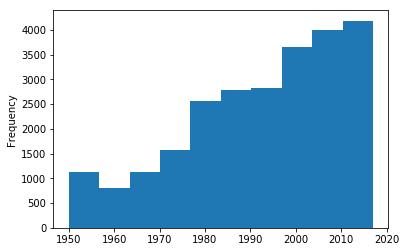

In [14]:
%matplotlib inline
dF["Year"].plot.hist()


#### 5. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [17]:
dF #Вывод таблицы до удаленеия

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [18]:
dF0=dF[~(dF==0).any(axis=1)] #Удаление нулевых значений

In [19]:
dF0 #Вывод новой таблицы

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0
10,10,1950.0,Charlie Black,F-C,28.0,AND,29.0,NaN,NaN,NaN,...,0.688,NaN,NaN,NaN,88.0,NaN,NaN,NaN,133.0,279.0
11,11,1950.0,Nelson Bobb,PG,25.0,PHW,57.0,NaN,NaN,NaN,...,0.626,NaN,NaN,NaN,46.0,NaN,NaN,NaN,97.0,242.0
12,12,1950.0,Jake Bornheimer,F-C,22.0,PHW,60.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,40.0,NaN,NaN,NaN,111.0,254.0


#### 6. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).


In [20]:
#Использую новую таблицу, без нулевых значений, для более удобного поиска игрока с наименьшим PTS
dF0["PTS"].max() #Поиск максимально набранных очков 

4029.0

In [21]:
dF0[dF0["PTS"]==4029] #Вывод игрока с максимально набранными очками

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1706,1706,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,NaN,3882.0,31.7,...,0.613,NaN,NaN,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0


In [ ]:
dF0["PTS"].min() #Поиск минимально набранных очков

In [23]:
dF0[dF0["PTS"]==3] #Вывод игрока с минимально набранными очками

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
194,194,1950.0,Mike Novak,C-F,34.0,ROC,5.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,10.0,3.0


#### 7.Добавьте в набор данных признак, являющийся произведением двух других признаков.


In [24]:
dF["Sum"]=dF["G"]*dF["PTS"] #Создаю новый столбец который будет содержать произведение переменных содержащихся в столбцах G и PTS

In [26]:
dF #Вывод таблицы, появился новый столбец Sum

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Sum
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,28854.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,13671.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,29346.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,945.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,767.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,8.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0,53700.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0,30.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0,42965.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0,13752.0


#### 8. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [28]:
from scipy.stats import pearsonr
dF=dF[["Age","G"]].dropna()
pearsonr(dF["Age"],dF["G"]) #кореляция Пирсона


(0.027397610786996558, 1.714673862796359e-05)

In [29]:
from scipy.stats import spearmanr
dF=dF[["Age","G"]].dropna()
spearmanr (dF["Age"],dF["G"]) #кореляция Спирмена


SpearmanrResult(correlation=0.03842520100651231, pvalue=1.633138829299717e-09)

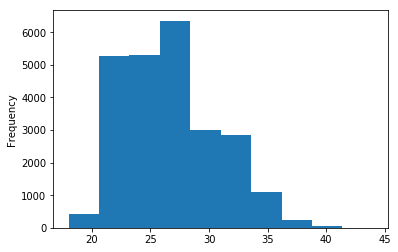

In [30]:
#Гистограмма для Age
s = pd.Series(dF["Age"])
s.plot.hist()


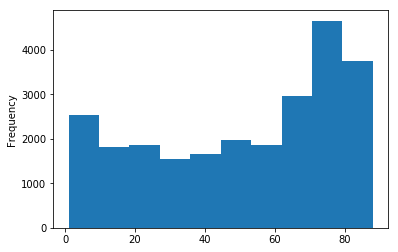

In [31]:
#Гистограмма для G
s = pd.Series(dF["G"])
s.plot.hist()
